<a href="https://colab.research.google.com/github/KirellosY/Social-Media-EDA/blob/main/SocialMediaEngagement_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [57]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
divyaraj2006_social_media_engagement_path = kagglehub.dataset_download('divyaraj2006/social-media-engagement')

print('Data source import complete.')


Data source import complete.


In [58]:
import pandas as pd
import numpy as np
import plotly.express as px

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# !pip install mplcyberpunk

In [61]:
import mplcyberpunk

In [62]:
df = pd.read_csv(divyaraj2006_social_media_engagement_path + "/social_media_engagement1.csv")

In [63]:
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [65]:
df['post_time'] = pd.to_datetime(df['post_time'])

In [66]:
df['post_day'] = df['post_time'].dt.day_name()

In [67]:
df.describe()

,post_id,post_time,likes,comments,shares
count,100.000000,100,100.000000,100.00000,100.000000
mean,50.500000,2023-06-26 12:04:57,2381.810000,202.66000,415.650000
min,1.000000,2023-01-01 06:00:00,15.000000,10.00000,16.000000
25%,25.750000,2023-04-09 16:48:45,895.750000,89.75000,183.000000
50%,50.500000,2023-06-13 18:22:30,2220.000000,171.00000,356.500000
75%,75.250000,2023-10-02 15:03:45,3593.250000,299.00000,689.500000
max,100.000000,2023-12-31 22:30:00,5000.000000,500.00000,993.000000
std,29.011492,NaN,1632.573284,138.84067,283.877601


In [68]:
df.isna().sum()

,0
post_id,0
platform,0
post_type,0
post_time,0
likes,0
comments,0
shares,0
post_day,0
sentiment_score,0


In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df['post_id'].duplicated().sum()

np.int64(0)

In [71]:
df.drop(['post_id'], axis=1, inplace=True)

# 1 column Analysis

## Platforms

In [72]:
plat= df["platform"].value_counts()

fig = px.pie(df, names=plat.index, values=plat.values, color= plat.index,)
fig.show()

## Post Type

In [73]:
df['post_type'].unique()

array(['image', 'carousel', 'poll', 'video', 'text'], dtype=object)

<Axes: xlabel='post_type', ylabel='count'>

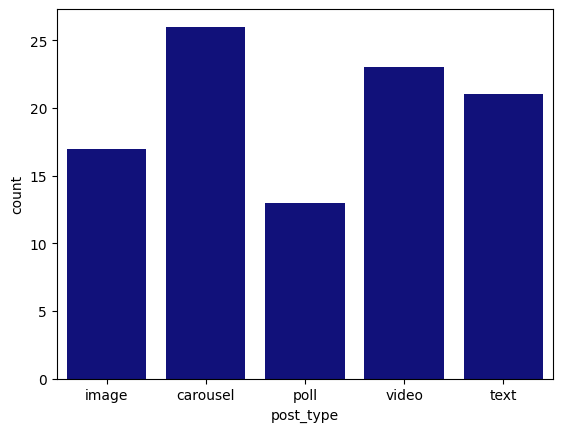

In [74]:
sns.countplot(x='post_type', data=df,color='darkblue')

## Post Day

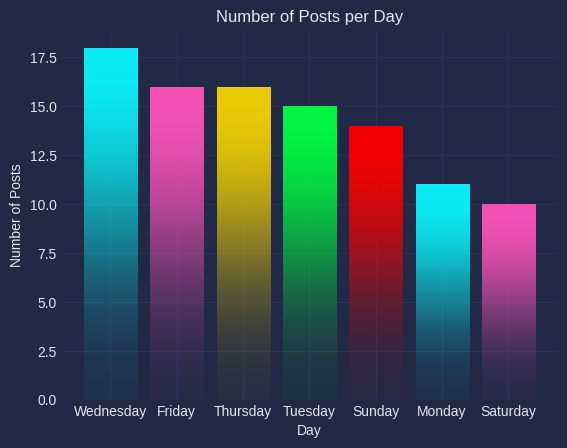

In [75]:
Day= df['post_day'].value_counts()
plt.style.use('cyberpunk')

colors = ["C0", "C1", "C2", "C3", "C4"]

bars = plt.bar(Day.index, Day.values, color=colors)

mplcyberpunk.add_bar_gradient(bars=bars)
plt.title('Number of Posts per Day')
plt.xlabel('Day')
plt.ylabel('Number of Posts')
plt.show()

## Post Time

### Month

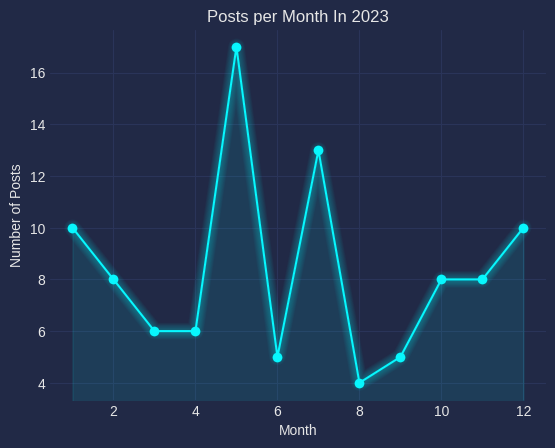

In [76]:
month = df['post_time'].dt.month.value_counts().sort_index()
plt.style.use("cyberpunk")

plt.plot(month, marker='o')

mplcyberpunk.add_glow_effects()
plt.title('Posts per Month In 2023')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.show()

### Day Date

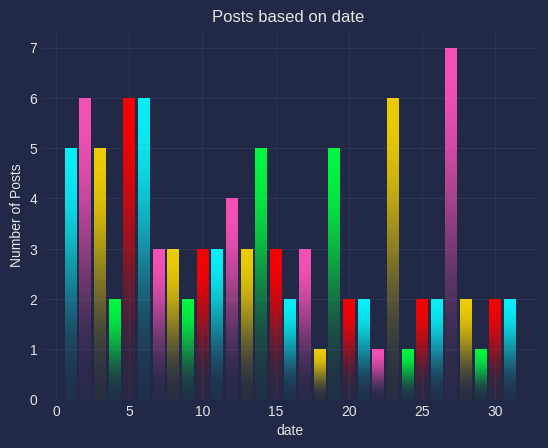

In [77]:
date = df['post_time'].dt.day.value_counts().sort_index()
bars = plt.bar(date.index, date.values, color=colors)

mplcyberpunk.add_bar_gradient(bars=bars)
plt.title('Posts based on date ')
plt.xlabel('date')
plt.ylabel('Number of Posts')
plt.show()

### Hour

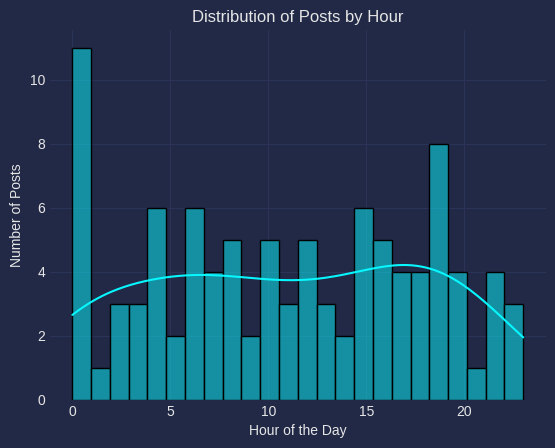

In [78]:
sns.histplot(df['post_time'].dt.hour, bins=24, kde=True)
plt.title('Distribution of Posts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.show()

## likes

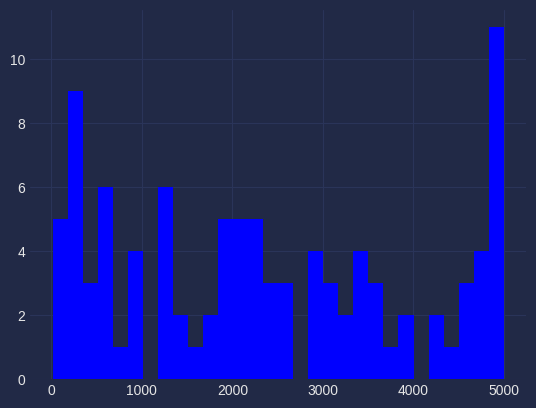

In [79]:
plt.hist(df['likes'], bins=30, color='blue')
plt.show()

## Comments

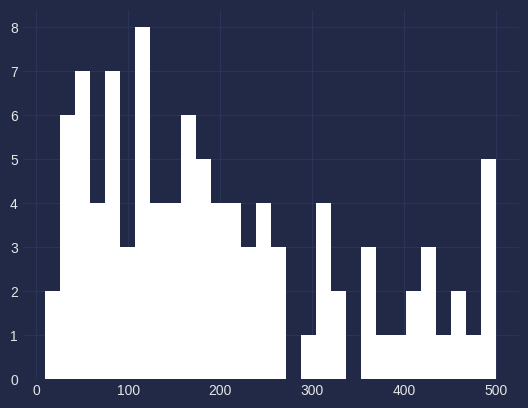

In [80]:
plt.hist(df['comments'], bins=30, color='white')
plt.show()

## Shares

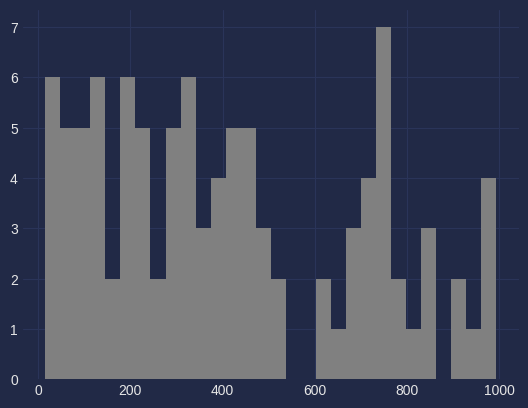

In [81]:
plt.hist(df['shares'], bins=30, color='gray')
plt.show()

## Sentiment Score

In [82]:
df['sentiment_score'].value_counts()

,count
sentiment_score,
positive,46
neutral,27
negative,27


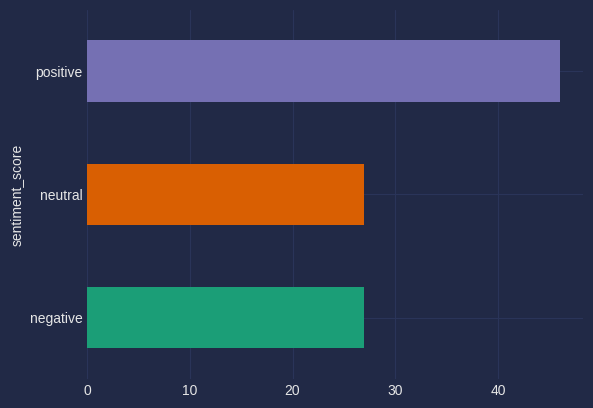

In [83]:
df.groupby('sentiment_score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Interactions

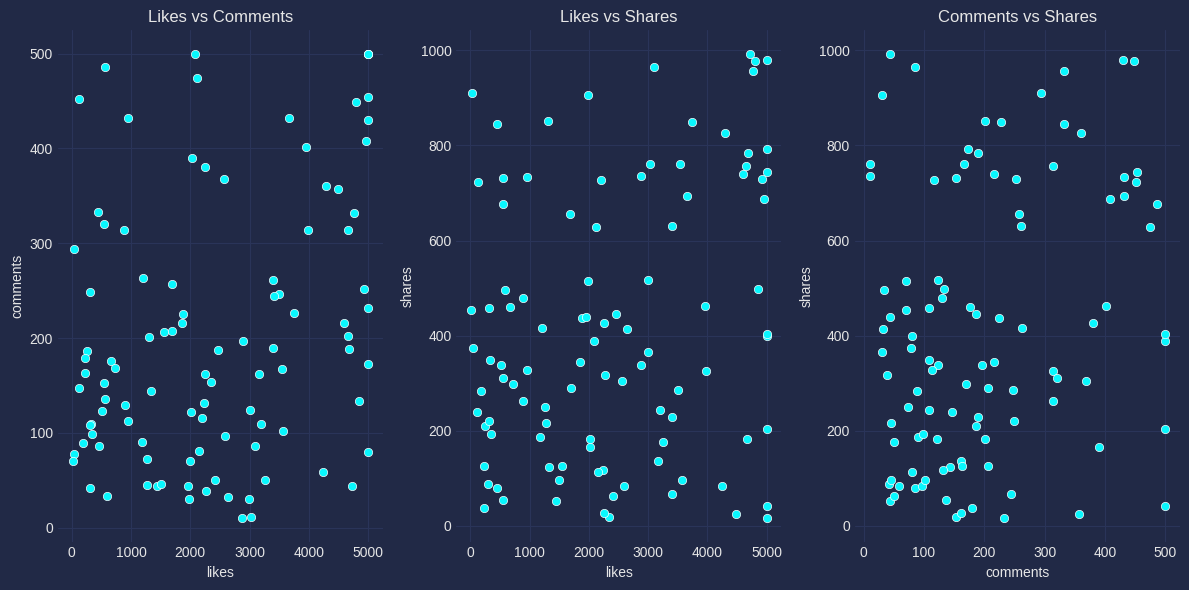

In [84]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='likes', y='comments', data=df)
plt.title('Likes vs Comments')

plt.subplot(1, 3, 2)
sns.scatterplot(x='likes', y='shares', data=df)
plt.title('Likes vs Shares')

plt.subplot(1, 3, 3)
sns.scatterplot(x='comments', y='shares', data=df)
plt.title('Comments vs Shares')

plt.tight_layout()
plt.show()

In [85]:
df[(df['likes']> 4999) & (df['shares']> 900) ]

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
38,Facebook,video,2023-01-01 06:00:00,5000,430,980,Sunday,neutral


In [86]:
FC_likes = df[df['platform']== 'Facebook'].loc[0:,'likes'].sum()
Insta_likes = df[df['platform']== 'Instagram'].loc[0:,'likes'].sum()
X_likes = df[df['platform']== 'Twitter'].loc[0:,'likes'].sum()

In [87]:
df.loc[0:99,'likes'].sum()

np.int64(238181)

In [88]:
FC_com = df[df['platform']== 'Facebook'].loc[0:,'comments'].sum()
Insta_com = df[df['platform']== 'Instagram'].loc[0:,'comments'].sum()
X_com = df[df['platform']== 'Twitter'].loc[0:,'comments'].sum()

In [89]:
FC_share = df[df['platform']== 'Facebook'].loc[0:,'shares'].sum()
Insta_share = df[df['platform']== 'Instagram'].loc[0:,'shares'].sum()
X_share = df[df['platform']== 'Twitter'].loc[0:,'shares'].sum()

In [90]:
interactions = pd.DataFrame({'Facebook':[FC_likes,FC_com,FC_share],
                            'Instagram': [Insta_likes,Insta_com,Insta_share],
                            'X':[X_likes,X_com,X_share]},index=["Likes", "Comments", "Shares"] )
interactions

,Facebook,Instagram,X
Likes,86392,107994,43795
Comments,7965,8368,3933
Shares,15180,18906,7479


In [91]:
interactions = interactions.T

In [92]:
fig = px.bar(interactions, x=interactions.index, y=['Likes', 'Comments', 'Shares'], barmode='group')
fig.update_layout(title='Interactions by Platform',
                  xaxis_title='Platform',
                  yaxis_title='Count')
fig.show()

In [93]:
top_8_likes = df.nlargest(8, 'likes')
top_8_likes

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
23,Instagram,carousel,2023-01-01 20:00:00,5000,80,399,Sunday,positive
35,Facebook,video,2023-04-08 19:15:00,5000,500,43,Saturday,positive
38,Facebook,video,2023-01-01 06:00:00,5000,430,980,Sunday,neutral
47,Facebook,video,2023-03-22 03:15:00,5000,232,16,Wednesday,negative
73,Instagram,video,2023-04-14 10:30:00,5000,454,744,Friday,positive
74,Facebook,video,2023-07-26 20:15:00,5000,500,404,Wednesday,positive
82,Instagram,video,2023-12-06 04:00:00,5000,173,792,Wednesday,negative
98,Instagram,poll,2023-12-29 12:15:00,5000,500,204,Friday,positive


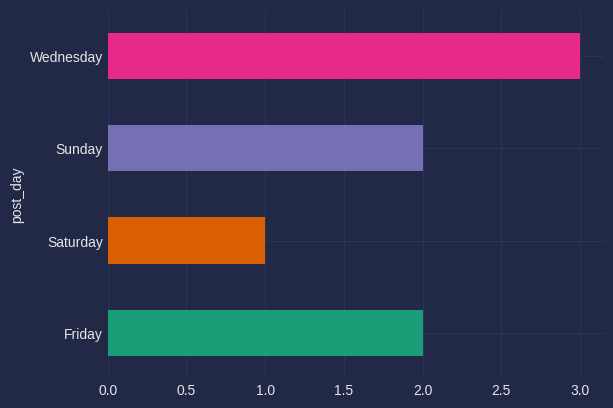

In [94]:
from matplotlib import pyplot as plt
import seaborn as sns
top_8_likes.groupby('post_day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [95]:
from wordcloud import WordCloud

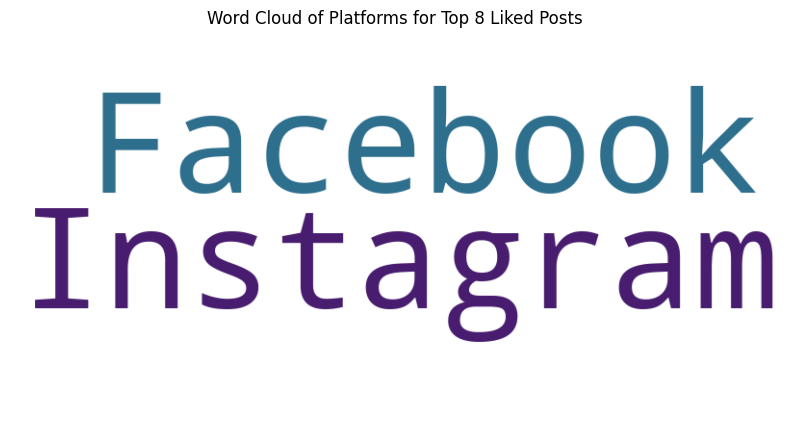

In [96]:
# Generate a word cloud of platforms from the top 10 liked posts
platform_counts = top_8_likes['platform'].value_counts().to_dict()
plt.style.use("default")
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platform_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Platforms for Top 8 Liked Posts')
plt.show()

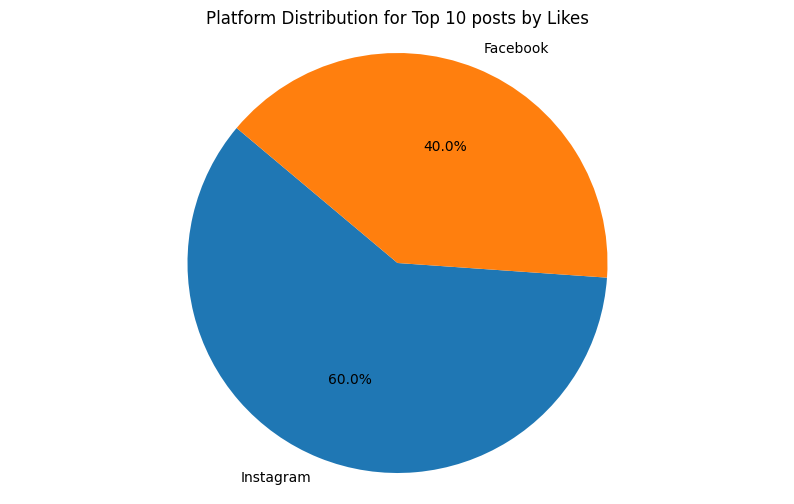

In [97]:
plt.figure(figsize=(10, 6))
plt.pie(top_10_likes['platform'].value_counts(), labels=top_10_likes['platform'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Platform Distribution for Top 10 posts by Likes')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

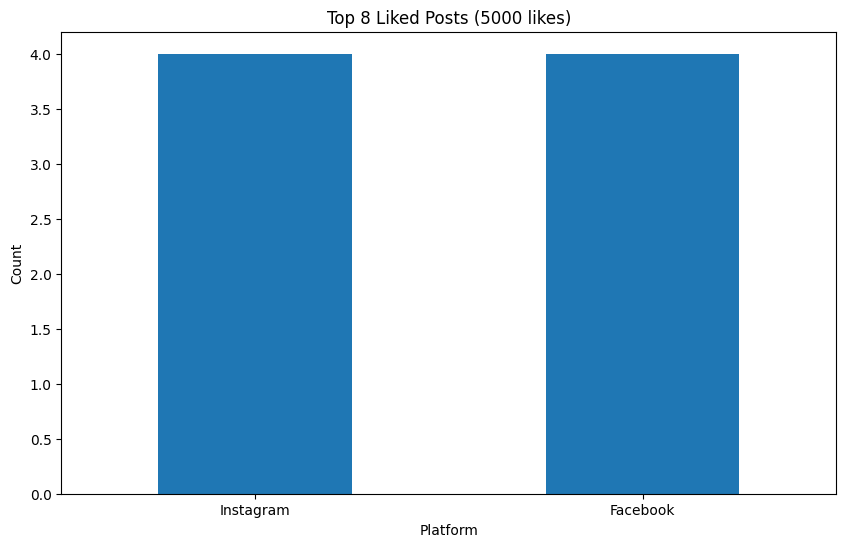

In [98]:
top_8_likes['platform'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Top 8 Liked Posts (5000 likes)')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

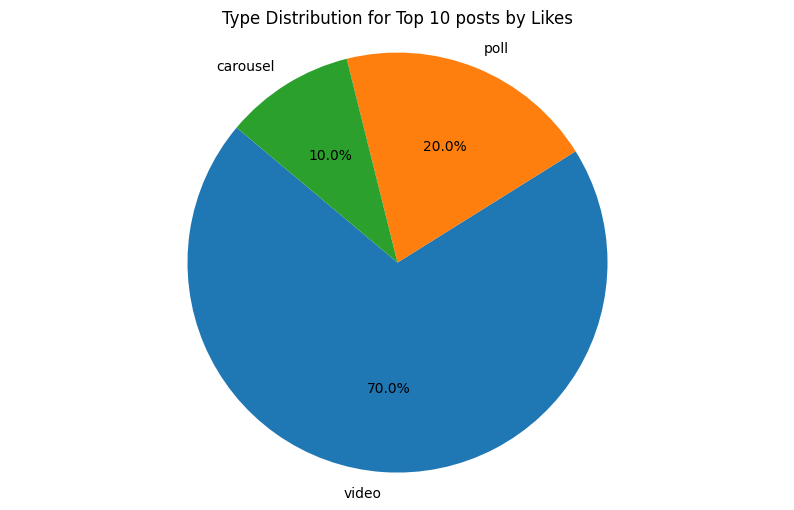

In [99]:
top_10_likes = df.nlargest(10, 'likes')
plt.figure(figsize=(10, 6))
plt.pie(top_10_likes['post_type'].value_counts(), labels=top_10_likes['post_type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Type Distribution for Top 10 posts by Likes')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [100]:
top_4_comments = df.nlargest(4, 'comments')
top_4_comments

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
27,Facebook,poll,2023-03-01 08:00:00,2083,500,388,Wednesday,neutral
35,Facebook,video,2023-04-08 19:15:00,5000,500,43,Saturday,positive
74,Facebook,video,2023-07-26 20:15:00,5000,500,404,Wednesday,positive
98,Instagram,poll,2023-12-29 12:15:00,5000,500,204,Friday,positive


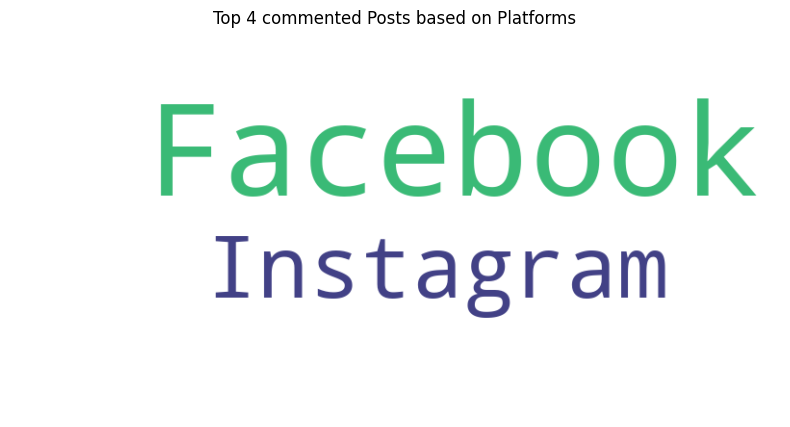

In [101]:
platform_counts = top_4_comments['platform'].value_counts().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platform_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 4 commented Posts based on Platforms')
plt.show()

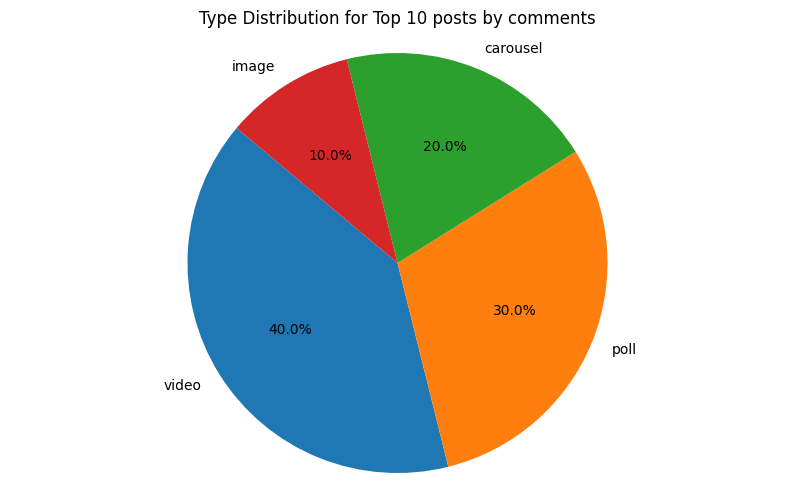

In [102]:
top_10_comments = df.nlargest(10, 'comments')
plt.figure(figsize=(10, 6))
plt.pie(top_10_comments['post_type'].value_counts(), labels=top_10_comments['post_type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Type Distribution for Top 10 posts by comments')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [103]:
top_10_shares = df.nlargest(10, 'shares')
top_10_shares

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
46,Facebook,poll,2023-08-08 17:45:00,4726,44,993,Tuesday,negative
38,Facebook,video,2023-01-01 06:00:00,5000,430,980,Sunday,neutral
30,Facebook,poll,2023-09-10 13:45:00,4795,449,978,Sunday,negative
69,Facebook,text,2023-06-12 09:30:00,3094,86,965,Monday,negative
59,Instagram,carousel,2023-05-19 04:30:00,4763,332,956,Friday,positive
95,Instagram,carousel,2023-07-12 17:45:00,36,294,911,Wednesday,positive
6,Instagram,image,2023-02-26 11:45:00,1982,30,906,Sunday,positive
34,Instagram,image,2023-06-06 19:30:00,1309,201,852,Tuesday,negative
61,Facebook,carousel,2023-01-27 15:45:00,3742,227,849,Friday,negative
39,Instagram,carousel,2023-08-04 12:45:00,447,333,845,Friday,negative


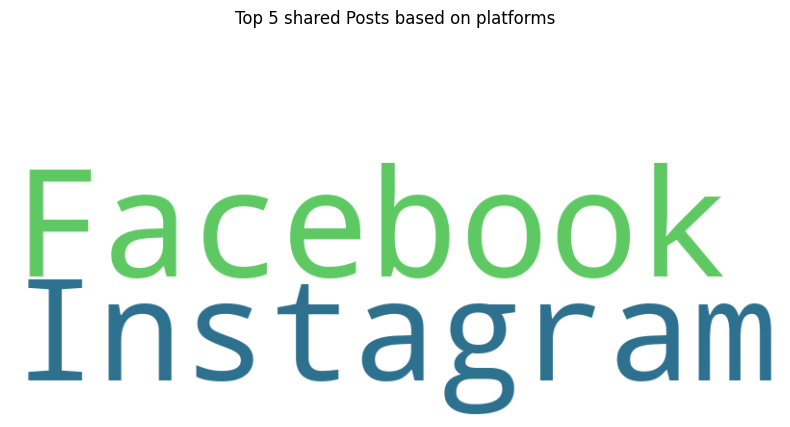

In [104]:
platform_counts = top_10_shares['platform'].value_counts().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platform_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 5 shared Posts based on platforms')
plt.show()

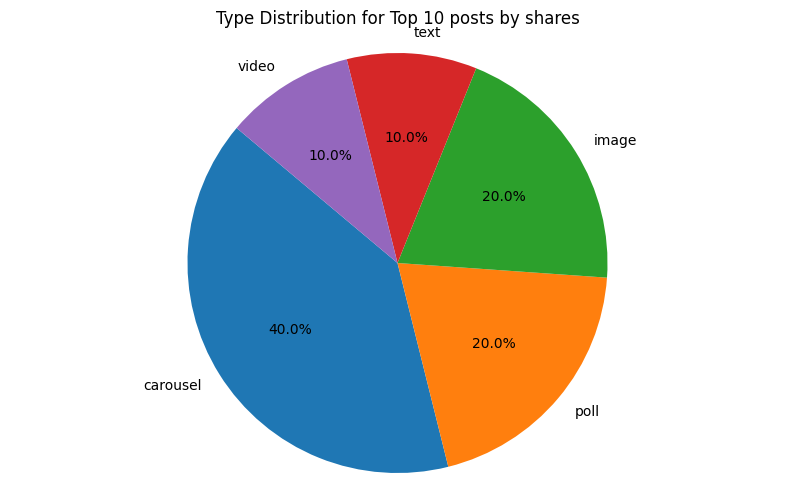

In [105]:
top_10_shares = df.nlargest(10, 'shares')
plt.figure(figsize=(10, 6))
plt.pie(top_10_shares['post_type'].value_counts(), labels=top_10_shares['post_type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Type Distribution for Top 10 posts by shares')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [106]:
LikComSha= df.nlargest(10, ['likes','comments','shares'])
LikComSha

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
74,Facebook,video,2023-07-26 20:15:00,5000,500,404,Wednesday,positive
98,Instagram,poll,2023-12-29 12:15:00,5000,500,204,Friday,positive
35,Facebook,video,2023-04-08 19:15:00,5000,500,43,Saturday,positive
73,Instagram,video,2023-04-14 10:30:00,5000,454,744,Friday,positive
38,Facebook,video,2023-01-01 06:00:00,5000,430,980,Sunday,neutral
47,Facebook,video,2023-03-22 03:15:00,5000,232,16,Wednesday,negative
82,Instagram,video,2023-12-06 04:00:00,5000,173,792,Wednesday,negative
23,Instagram,carousel,2023-01-01 20:00:00,5000,80,399,Sunday,positive
2,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative
41,Instagram,video,2023-11-23 02:00:00,4929,252,730,Thursday,negative


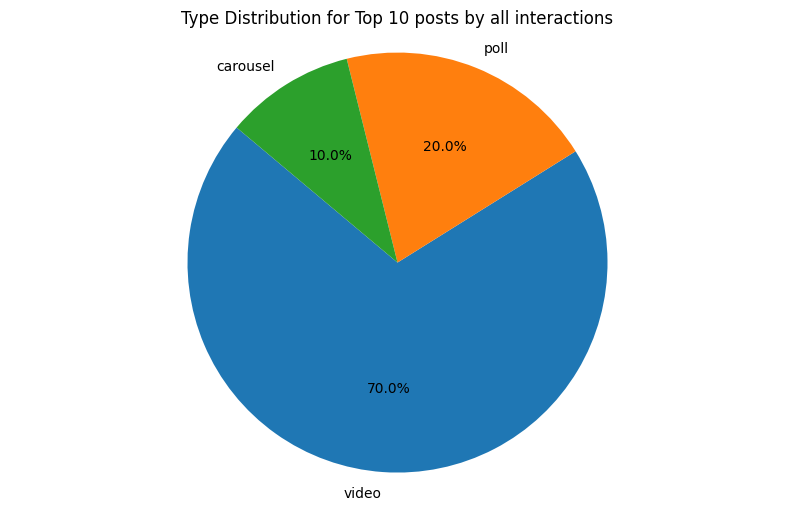

In [107]:
plt.figure(figsize=(10, 6))
plt.pie(LikComSha['post_type'].value_counts(), labels=LikComSha['post_type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Type Distribution for Top 10 posts by all interactions')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [108]:
month = LikComSha['post_time'].dt.month.value_counts().sort_index()

fig = px.bar(month, x=month.index, y=month.values, color=month.index)
fig.update_layout(title='Top 10 Posts In 2023',
                  xaxis_title='Month',
                  yaxis_title='Count')

In [109]:
hour = LikComSha['post_time'].dt.hour.value_counts().sort_index()

fig = px.bar(hour, x=hour.index, y=hour.values, color=hour.index)
fig.update_layout(title='Top 10 Posts by hours',
                  xaxis_title='Hour',
                  yaxis_title='Count')

Text(0.5, 1.0, 'Sentiment Score for Top 10 posts by all interactions')

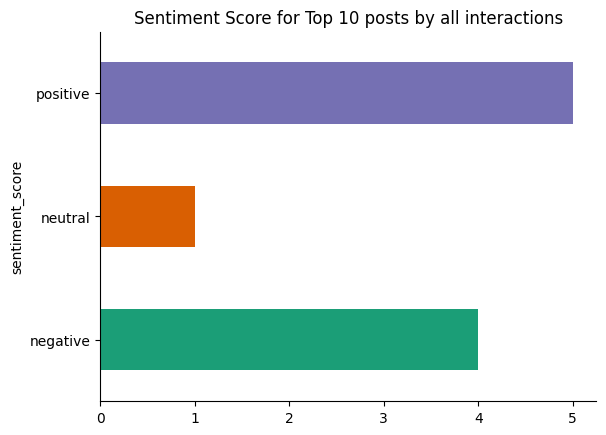

In [110]:
LikComSha.groupby('sentiment_score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Sentiment Score for Top 10 posts by all interactions')